In [1]:
import sys
sys.path.insert(0, '..\\..\\frxas.py')

import numpy as np
import h5py
import matplotlib.pyplot as plt
import lmfit
from lmfit import Parameters, minimize, report_fit

from frxas import hdf5_io
from frxas import models
from frxas import visualization

%reload_ext autoreload
%autoreload 2

In [2]:
f1 = hdf5_io.get_all_datasets('July18_frXAS') #, start_indices = [[4, 0, 2, 2], [4, 0, 6, 0], [1, 0, 2]])
hdf5_io.close_frxas_file('July18_frXAS')

In [3]:
x, data, frequencies, gases, sizes = hdf5_io.unpack_data(f1, kind='data_adj')

In [4]:
colors = ['k', 'r', 'b', 'c']
markers = [(6, 2, 0), 's', '^', 'o']

colors = colors * (len(colors) % len(data))
markers = markers * (len(colors) % len(data))

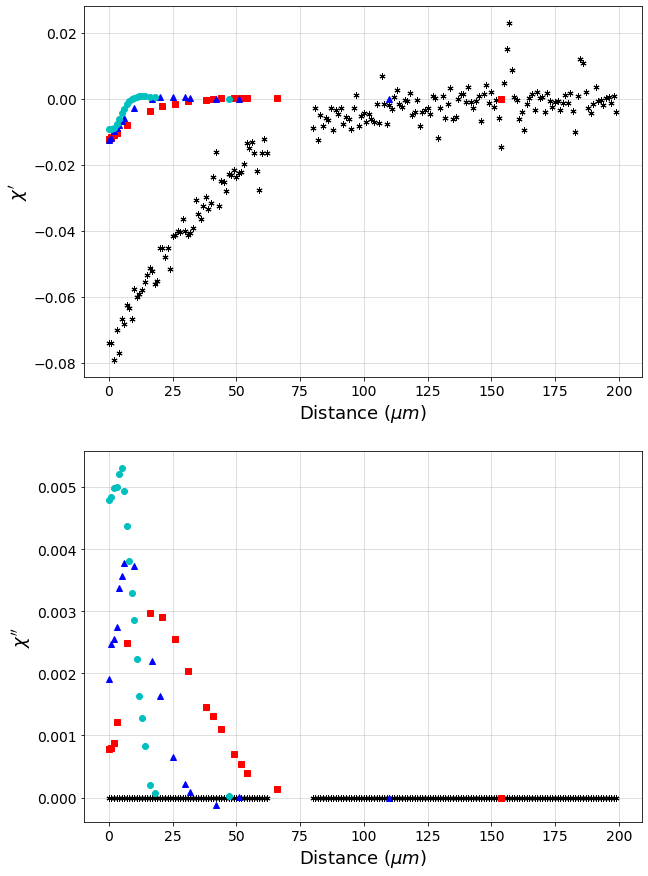

In [5]:
fig, axes = plt.subplots(nrows=2, figsize=(10,15))

for iy in np.arange(0,sizes[0]):
    visualization.plot_chi(axes, x[iy], data[iy], color=colors[iy], marker=markers[iy], ls='')
# for iy in np.arange(sizes[0],sum(sizes[:2])):
#     visualization.plot_chi(axes, x[iy], data[iy], color=colors[iy], marker=markers[iy], ls='')
# for iy in np.arange(sum(sizes[:2]),sum(sizes)):
#     visualization.plot_chi(axes, x[iy], data[iy], color=colors[iy], marker=markers[iy], ls='')

plt.show()

In [6]:
fit_params = Parameters()

for iy, y in enumerate(data):
#     fit_params.add('amp_%i' % (iy+1), value=-np.abs(data[iy][0]), min=-1, max=0)
    fit_params.add('amp_%i' % (iy+1), value=-.002, min=-1, max=0)
    fit_params.add('ld_%i' % (iy+1), value=10, min=0.0, max=200)
    fit_params.add('tg_%i' % (iy+1), value=.1, min=0.01, max=100.0)

    fit_params.add('f_%i' % (iy+1), value=frequencies[iy], vary=False)
    
for iy in np.arange(1, sizes[0]):
    fit_params['ld_%i' % (iy+1)].expr = 'ld_1'
    fit_params['tg_%i' % (iy+1)].expr = 'tg_1'

for iy in np.arange(sizes[0]+1, sum(sizes[:2])):
    fit_params['ld_%i' % (iy+1)].expr = 'ld_5'
    fit_params['tg_%i' % (iy+1)].expr = 'tg_5'

for iy in np.arange(sum(sizes[:2])+1, len(data)):
    fit_params['ld_%i' % (iy+1)].expr = 'ld_9'
    fit_params['tg_%i' % (iy+1)].expr = 'tg_9'

In [7]:
mini=lmfit.Minimizer(models.objective_fun, fit_params, fcn_args=(x, data, models.chi_amp))

In [8]:
out = mini.minimize(method='leastsq')
print(out.redchi)
report_fit(out.params)

4.992221066684399e-06
[[Variables]]
    amp_1:  -0.08085821 +/- 7.2244e-04 (0.89%) (init = -0.002)
    ld_1:    37.6791175 +/- 0.51777016 (1.37%) (init = 10)
    tg_1:    3.53454405 +/- 0.60276465 (17.05%) (init = 0.1)
    f_1:     0 (fixed)
    amp_2:  -0.01181738 +/- 0.00106511 (9.01%) (init = -0.002)
    ld_2:    37.6791175 +/- 0.51777015 (1.37%) == 'ld_1'
    tg_2:    3.53454405 +/- 0.60276465 (17.05%) == 'tg_1'
    f_2:     0.25 (fixed)
    amp_3:  -0.01227755 +/- 0.00107451 (8.75%) (init = -0.002)
    ld_3:    37.6791175 +/- 0.51777015 (1.37%) == 'ld_1'
    tg_3:    3.53454405 +/- 0.60276465 (17.05%) == 'tg_1'
    f_3:     1 (fixed)
    amp_4:  -0.01279391 +/- 0.00129904 (10.15%) (init = -0.002)
    ld_4:    37.6791175 +/- 0.51777015 (1.37%) == 'ld_1'
    tg_4:    3.53454405 +/- 0.60276465 (17.05%) == 'tg_1'
    f_4:     4 (fixed)
    amp_5:  -0.06476687 +/- 9.7468e-04 (1.50%) (init = -0.002)
    ld_5:    18.9183816 +/- 0.41298087 (2.18%) (init = 10)
    tg_5:    1.35887278 +/- 0

C:\Users\shadd\Anaconda3\lib\site-packages\lmfit-0.9.13-py3.6.egg\lmfit\printfuncs.py:177: RuntimeWarning: invalid value encountered in long_scalars


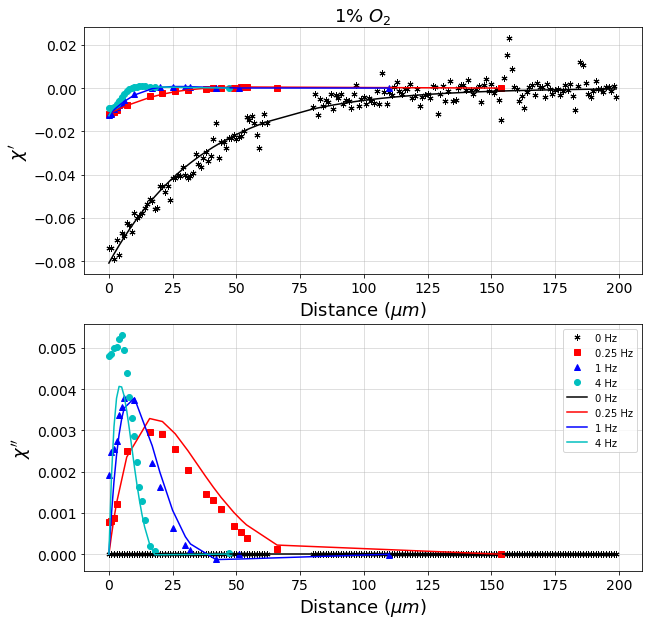

In [9]:
fig, axes = plt.subplots(nrows=2, figsize=(10,10))

for iy in np.arange(0,sizes[0]):
    visualization.plot_chi(axes, x[iy], data[iy], color=colors[iy],
                           marker=markers[iy], ls='',
                           label=str(frequencies[iy]) + ' Hz')
for iy in np.arange(0,sizes[0]):
    visualization.plot_chi(axes, x[iy], models.dataset_fun(out.params, iy, x[iy], models.chi_amp),
                           color=colors[iy], marker='',
                           label=str(frequencies[iy]) + ' Hz')
    
axes[0].set_title('1% $O_2$', fontsize=18)
plt.legend()
plt.show()
# plt.savefig(r'Plots\Pattern_Model_Amp_yd_1%O2.png', dpi=300, bbox_inches='tight')

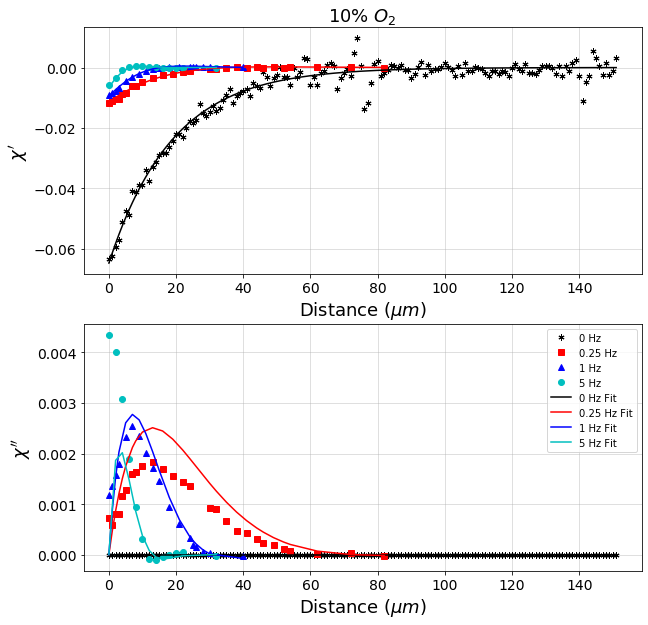

In [10]:
fig, axes = plt.subplots(nrows=2, figsize=(10,10))

for iy in np.arange(sizes[0],sum(sizes[:2])):
    visualization.plot_chi(axes, x[iy], data[iy], color=colors[iy],
                           marker=markers[iy], ls='',
                           label=str(frequencies[iy]) + ' Hz')

for iy in np.arange(sizes[0],sum(sizes[:2])):
    visualization.plot_chi(axes, x[iy], models.dataset_fun(out.params, iy, x[iy], models.chi_amp),
                           color=colors[iy], marker='',
                           label=str(frequencies[iy]) + ' Hz Fit')
    
axes[0].set_title('10% $O_2$', fontsize=18)
plt.legend()
plt.show()

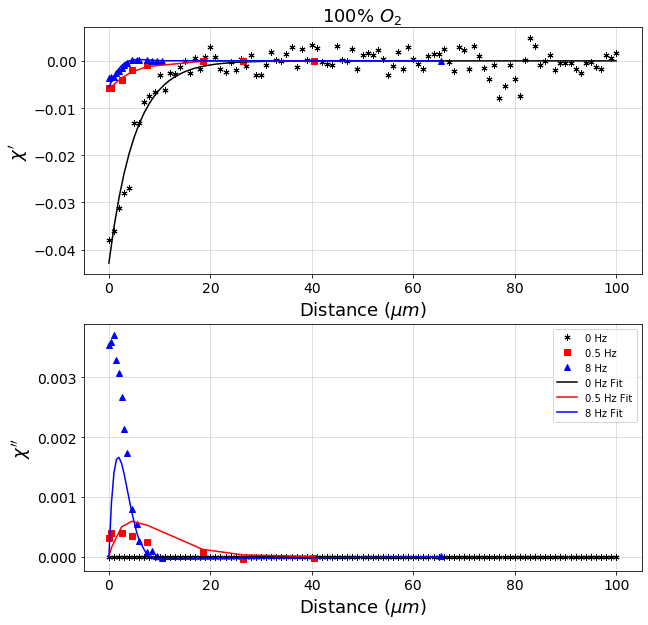

In [11]:
fig, axes = plt.subplots(nrows=2, figsize=(10,10))

for iy in np.arange(sum(sizes[:2]),sum(sizes)):
    visualization.plot_chi(axes, x[iy], data[iy], color=colors[iy],
                           marker=markers[iy], ls='', 
                           label=str(frequencies[iy]) + ' Hz')
for iy in np.arange(sum(sizes[:2]),sum(sizes)):
    visualization.plot_chi(axes, x[iy], models.dataset_fun(out.params, iy, x[iy], models.chi_amp),
                           color=colors[iy], marker='',
                           label=str(frequencies[iy]) + ' Hz Fit')
    
axes[0].set_title('100% $O_2$', fontsize=18)
plt.legend()
plt.show()

Data clearly not fitting to the purely ideal model. Seemingly occurs because the real data isn't scaled to 1 (max values for real components are ~0.002)